# Doggos vs Cattos

### Computer Vision

### Project: Build a binary Random Forrest classifier that will classify pictures of dogs and cats.
_**Doggos vs Cattos**_ is a machine learning project focused on researching how diffrent learning algorithms perform in terms of classification RGB images and what kind of information can be mined using them.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from dogs_vs_cats import data_utils

plt.rcParams['figure.figsize'] = (7.0, 7.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some magic so that the notebook will reload external python modules
%load_ext autoreload
%autoreload 2

In [2]:
# Cleaning up variable to prevent loading data multiple times (which may cause memory issue)
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

img_width = 64
img_height = 64
channels = 3

(X_train, y_train), (X_test, y_test) = data_utils.load_data(image_dim=(img_width, img_height))

print('Training data shape: ', X_train.shape)
print('Training label shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test label shape: ', y_test.shape)

Found 18000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Training data shape:  (18000, 64, 64, 3)
Training label shape:  (18000,)
Test data shape:  (5000, 64, 64, 3)
Test label shape:  (5000,)


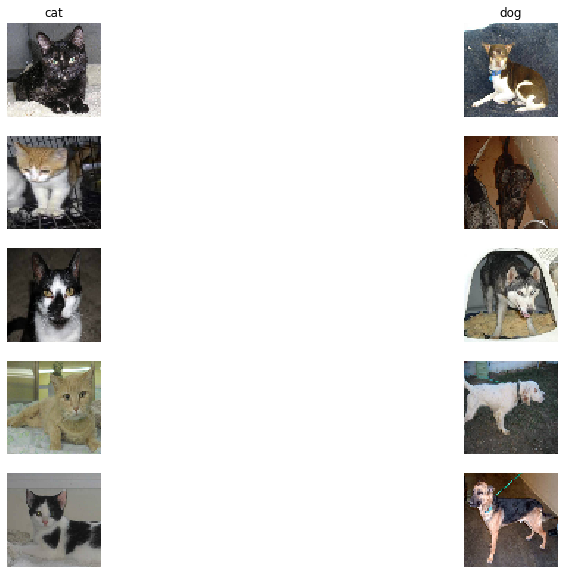

In [3]:
# Visualize some examples from a dataset
classes = ['cat', 'dog']
num_classes = len(classes)
samples_per_class = 5

figure = plt.figure(figsize=(15.0, 10.0))
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)

plt.show()

In [4]:
# Reshape the image into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(18000, 12288) (5000, 12288)


In [5]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=200,
                                       max_depth=20,
                                       n_jobs=-1)
random_forest.fit(X_train, y_train)
random_forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

### Evaluating best Random Forrest classifier

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = random_forest.predict(X_test)
print('Confusion matrix\n', confusion_matrix(y_test, y_pred))
print('\nClassification report\n', classification_report(y_test, y_pred))

Confusion matrix
 [[1692  808]
 [ 932 1568]]

Classification report
               precision    recall  f1-score   support

         0.0       0.64      0.68      0.66      2500
         1.0       0.66      0.63      0.64      2500

    accuracy                           0.65      5000
   macro avg       0.65      0.65      0.65      5000
weighted avg       0.65      0.65      0.65      5000



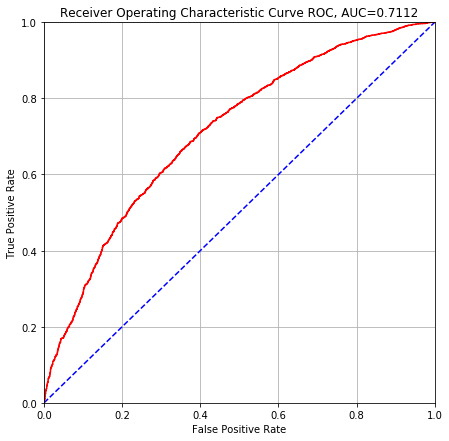

In [7]:
from dogs_vs_cats import data_vis

y_score = random_forest.predict_proba(X_test)
data_vis.plot_roc_curve(y_test, y_score[:, 1])